In [1]:
from sympy import *

#### 1.1 Euler-Lagrange alternative form

Show that the Euler-Lagrange equation is equivalent to

$$\frac{\partial F}{\partial x}
-\frac{d}{dx}
\left(F - y_x \frac{\partial F}{\partial y_x}\right)=0$$

$$\frac{\partial F}{\partial x}
-\frac{dF}{dx}
+ \frac{d}{dx} \left(y_x \frac{\partial F}{\partial y_x}\right)=0$$

$$\frac{\partial F}{\partial x}
-\frac{\partial F}{\partial x} -\frac{\partial F}{\partial y} \frac{\partial y}{\partial x} -\frac{\partial F}{\partial y_x} \frac{\partial y_x}{\partial x}
+ \left(y_{xx} \frac{\partial F}{\partial y_x}\right)
+  \left(y_x \frac{d}{dx} \frac{\partial F}{\partial y_x}\right)
=0$$

$$\frac{\partial F}{\partial x}
-\frac{\partial F}{\partial x} -\frac{\partial F}{\partial y} y_x -\frac{\partial F}{\partial y_x} y_{xx}
+ \left(y_{xx} \frac{\partial F}{\partial y_x}\right)
+  \left(y_x \frac{d}{dx} \frac{\partial F}{\partial y_x}\right)
=0 $$

$$
-\frac{\partial F}{\partial y} y_x 
+  \left(y_x \frac{d}{dx} \frac{\partial F}{\partial y_x}\right)
=0
$$

$$
y_x \left( -\frac{\partial F}{\partial y} 
+   \frac{d}{dx} \frac{\partial F}{\partial y_x}\right)
=0
$$

since this must hold for all $y_x$

$$ \frac{\partial F}{\partial y} 
-   \frac{d}{dx} \frac{\partial F}{\partial y_x}
=0
$$

Q.E.D

#### 1.2 Soap film

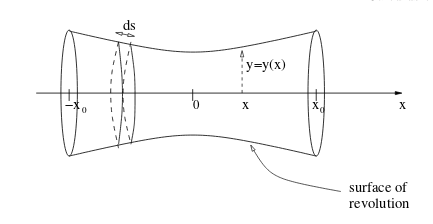

$$ ds = \sqrt{dx^2 + dy^2} $$

$$ dy = y_x dx $$

$$ ds = \sqrt{ dx^2 + \left( y_x dx \right)^2 } $$

$$ ds = \sqrt{ dx^2 \left( 1 + y_x^2 \right) } $$

$$ ds = \sqrt{  \left( 1 + y_x^2 \right) } dx $$

Circumference is

$$ 2 \pi y $$,

thus the area of the slice is

$$ 2 \pi \, y \, ds = 2 \pi \, y \, \sqrt{ 1 + y_x^2} \, dx $$,

and the total area is

$$ J \left( x \right) = 2 \pi \int_{-x_0}^{x_0} y \sqrt{ 1 + y_x^2 } \, dx $$

##### (b)

$$ \frac{\partial F}{\partial y} = \sqrt{1 + y_x^2 } $$

$$ \frac{d}{dx} \frac{\partial F}{\partial y_x} = \frac{d}{dx} y \frac12 \left( 1 + y_x^2 \right)^{-\frac12} 2 y_x $$

$$ \frac{d}{dx} \frac{\partial F}{\partial y_x} = 
\left( 1 + y_x^2 \right)^{-\frac12} y_x^2 +
y \left( -\frac12 \left( 1 + y_x^2  \right)^{-\frac32}  2 y_x^2 + \left( 1 + y_x^2  \right)^{-\frac12} \right) y_{xx}
$$

In [326]:
y=Function('y')
x=Symbol('x')
xp=Symbol('x^*')
x0=Symbol('x_0')
C=Symbol('C')
C2=Symbol('C_2')
yx2=Symbol(r'y_x^2')
b=Symbol('b')
a=Symbol('a')

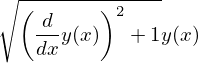

In [177]:
F=y(x)*sqrt(1+diff(y(x),x)**2)
F

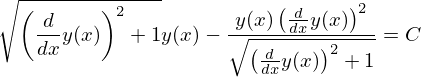

In [178]:
Eq(F - diff(y(x),x) * diff(F,diff(y(x),x)),C)

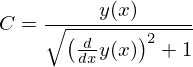

In [179]:
simplify(_)

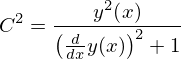

In [180]:
Eq(_.lhs**2 , _.rhs**2)

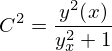

In [181]:
_.subs(diff(y(x),x)**2,yx2)

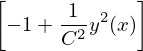

In [182]:
sol=solve(_,yx2)
sol

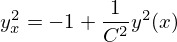

In [187]:
Eq(yx2,sol[0])

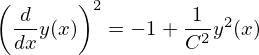

In [188]:
_.subs(yx2,diff(y(x),x)**2)

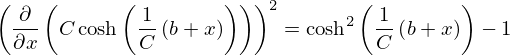

In [189]:
_.subs(y(x),C*cosh(1/C*(x+b)))

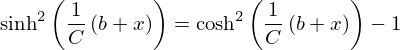

In [190]:
_.doit()

In [191]:
trigsimp(_.rhs-_.lhs,deep=True)

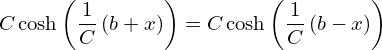

In [197]:
Eq(C*cosh(1/C*(b+x)),C*cosh(1/C*(b-x)))

In [198]:
solve(_,b)

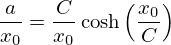

In [269]:
Eq(a/x0,C*cosh(x0/C)/x0)

<IPython.core.display.Javascript object>


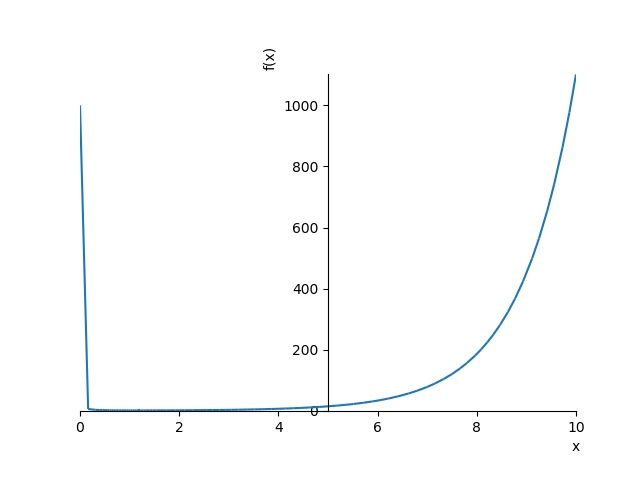

In [489]:
%matplotlib notebook
plot(1/x*cosh(x),(x,.001,10))

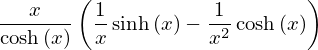

In [413]:
diff(1/x*cosh(x),x)*x/cosh(x)

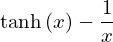

In [390]:
simplify(_)

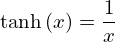

In [391]:
Eq(_+1/x,1/x)

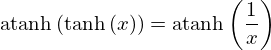

In [392]:
Eq(atanh(_.lhs),atanh(_.rhs))

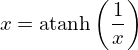

In [393]:
simplify(_)

In [394]:
_.subs(1/x,xp)

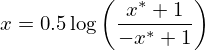

In [395]:
_.subs(atanh(xp),1/2*log((1+xp)/(1-xp)))

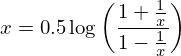

In [396]:
_.subs(xp,1/x)

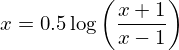

In [397]:
simplify(_)

In [414]:
(1/x*cosh(x)).subs(x,nsolve(_,x,1.2))

In [448]:
C0=nsolve(Eq(1.50887956153832,C*cosh(1/C)),C,.5)
C0

In [516]:
C1=nsolve(Eq(2,C*cosh(1/C)),C,.2)
C2=nsolve(Eq(2,C*cosh(1/C)),C,5.5)
C1,C2

In [351]:
from sympy.solvers.solvers import unrad


<IPython.core.display.Javascript object>


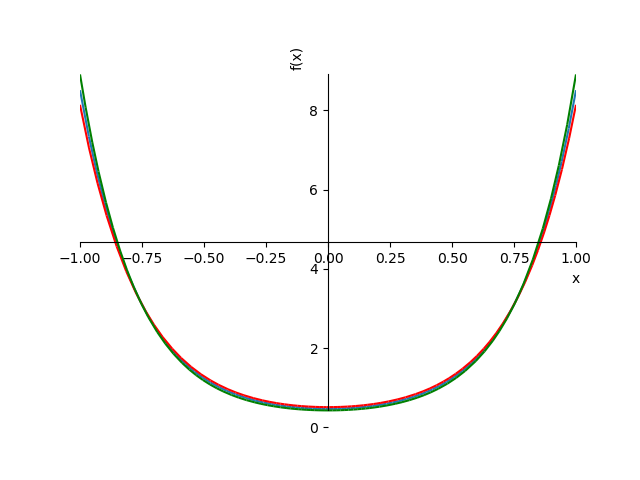

In [639]:
%matplotlib notebook
#C1=0.001
y1=C1*cosh(x/C1)
y2=(C1+0.0412647)*cosh(x/(C1+0.02))
y3=(C1-0.04135671)*cosh(x/(C1-0.02))
p=plot(y1*sqrt(1+diff(y1,x)**2),y2*sqrt(1+diff(y2,x)**2),y3*sqrt(1+diff(y3,x)**2),(x,-1,1), show=false)
p[1].line_color='r'
p[2].line_color='g'
p.show()

<IPython.core.display.Javascript object>


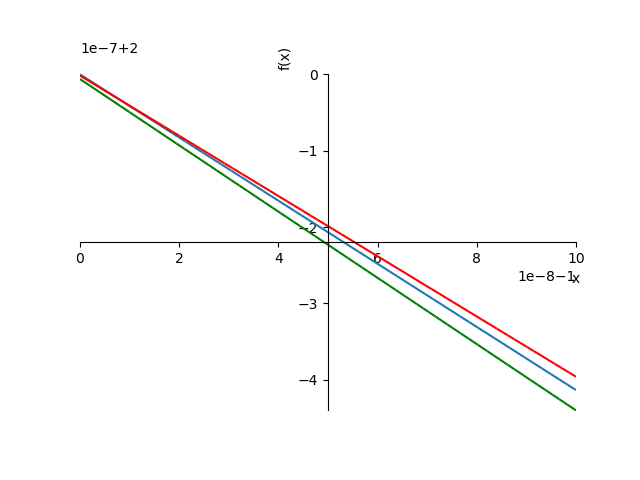

In [637]:
%matplotlib notebook
#C1=0.001
y1=C1*cosh(x/C1)
y2=(C1+0.0412647)*cosh(x/(C1+0.02))
y3=(C1-0.04135671)*cosh(x/(C1-0.02))
#y2=C2*cosh(x/C2)
p=plot(y1,y2,y3,(x,-1,-1+1e-7), show=false)
p[1].line_color='r'
p[2].line_color='g'
p.show()

In [649]:
N(Integral(y1,(x,-1,1)))

In [650]:
N(Integral(y2,(x,-1,1)))

In [651]:
N(Integral(y3,(x,-1,1)))